In [1]:
%matplotlib inline 
   
import ipywidgets as widgets    
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
from IPython.display import clear_output


GrayScale Image


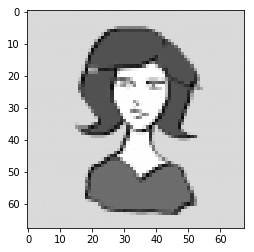

In [2]:
gray_img =  cv2.imread('original.png', cv2.IMREAD_GRAYSCALE)
print("GrayScale Image")
plt.imshow(gray_img, cmap='gray') # GrayScale Image
plt.show()

A Jupyter Widget

Kernel Size Param =  29


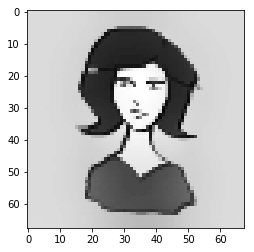

In [3]:
param = widgets.IntSlider(
    value=5,
    min=1,
    max=41,
    step=2,
    description='Kernel Size Param:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(param)
print(param.value)

def on_value_change(change):
    i = int(param.value)
    display(param)
    try:
        # BilateralFilter( src, d, sigmaColor, sigmaSpace)
        # src — исходное изображение 8-битное или с плавающей точкой, 1-канальное или 3-канальное.
        # d — диаметр каждого пикселя окрестности, которая используется в процессе фильтрации. 
        # Если значение не является положительным, оно вычисляется из sigmaSpace.
        # sigmaColor — сигма фильтр в цветовом пространстве.
        # sigmaSpace — сигма фильтр  в координатном пространстве.
        img = cv2.bilateralFilter(gray_img, i, i*2, i*2)
        clear_output()
        display(param)
        print('d = ', i)
        plt.imshow(img,  cmap='gray')
        plt.show()
    except:
        clear_output()
        display(param)
        print('d = ', i)
        print('Exception catched')
        

param.observe(on_value_change, names='value')


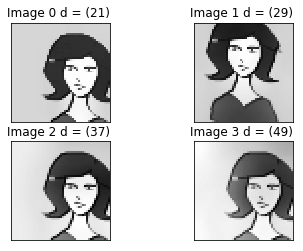

In [7]:
source_images = [
    cv2.imread('original.png', cv2.IMREAD_GRAYSCALE), 
    cv2.imread('original.png', cv2.IMREAD_GRAYSCALE)[10:60, 10:60], 
    cv2.imread('original.png', cv2.IMREAD_GRAYSCALE), 
    cv2.imread('original.png', cv2.IMREAD_GRAYSCALE)
]

min_w = source_images[0].shape[0]
min_h = source_images[0].shape[1]
for val in source_images:
    if (val.shape[0] < min_w):
        min_w = val.shape[0]
    if (val.shape[1] < min_h):
        min_h = val.shape[1]


for i in np.arange(len(source_images)):
    source_images[i] = source_images[i][0:min_w, 0:min_h]

index = 0
i = 21
#process 1st image
source_images[index] = cv2.bilateralFilter(source_images[index], i, i*2, i*2)
tlt = "Image "+ str(index) + " d = (" + str(i) + ") "
plt.subplot(221),plt.imshow(source_images[index], cmap='gray'),plt.title(tlt)
plt.xticks([]), plt.yticks([])

index = 1
i = 29
#process 2nd image
source_images[index] = cv2.bilateralFilter(source_images[index], i, i*2, i*2)
tlt = "Image "+ str(index) + " d = (" + str(i) + ") "
plt.subplot(222),plt.imshow(source_images[index], cmap='gray'),plt.title(tlt)
plt.xticks([]), plt.yticks([])

index = 2
i = 37
#process 3d image
source_images[index] = cv2.bilateralFilter(source_images[index], i, i*2, i*2)
tlt = "Image "+ str(index) + " d = (" + str(i) + ") "
plt.subplot(223),plt.imshow(source_images[index], cmap='gray'),plt.title(tlt)
plt.xticks([]), plt.yticks([])

index = 3
i = 49
#process 4th image
source_images[index] = cv2.bilateralFilter(source_images[index], i, i*2, i*2)
tlt = "Image "+ str(index) + " d = (" + str(i) + ") "
plt.subplot(224),plt.imshow(source_images[index], cmap='gray'),plt.title(tlt)
plt.xticks([]), plt.yticks([])

plt.show()